<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial110_binary_classification_malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/fWnQMGRB_fM

Only 500 images are uploaded to Google Drive for this execrise. 
Original dataset contains over 13k images for each class. 

Dataset from: https://lhncbc.nlm.nih.gov/publication/pub9932


Binary problem:
Question is: Is the image uninfected? If yes, probability is close to 1.
If no, the probablility is close to 0.


This is because we added label 1 to uninfected images. 
In summary, probability result close to 1 reflects uninfected image
and close to 0 reflects parasitized image


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

import os
import cv2
from PIL import Image
import numpy as np

In [ ]:
image_directory = '/content/drive/MyDrive/Colab Notebooks/data/cell_images/'
SIZE = 150
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.



In [ ]:
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

dataset = np.array(dataset)
label = np.array(label)

In [ ]:
print(dataset.shape)
print(label.shape)

(1000, 150, 150, 3)
(1000,)


Label for this image is:  1


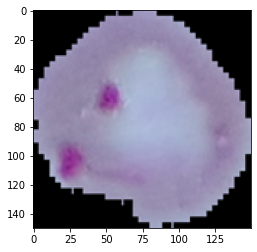

In [ ]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (150, 150, 3)))
print("Label for this image is: ", label[image_number])

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [ ]:
#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)
X_train = X_train / 255.
X_test = X_test / 255. 

In [ ]:
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  
#Do not use softmax for binary classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#But, also good for binary mutually exclusive (cat or not cat). 

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 30,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/30
13/13 [==============================] - 1s 57ms/step - loss: 0.2171 - accuracy: 0.9225 - val_loss: 0.3979 - val_accuracy: 0.8150
Epoch 2/30
13/13 [==============================] - 1s 47ms/step - loss: 0.1517 - accuracy: 0.9463 - val_loss: 0.4491 - val_accuracy: 0.8150
Epoch 3/30
13/13 [==============================] - 1s 47ms/step - loss: 0.1916 - accuracy: 0.9312 - val_loss: 0.5351 - val_accuracy: 0.7900
Epoch 4/30
13/13 [==============================] - 1s 47ms/step - loss: 0.1230 - accuracy: 0.9613 - val_loss: 0.4732 - val_accuracy: 0.8250
Epoch 5/30
13/13 [==============================] - 1s 47ms/step - loss: 0.3658 - accuracy: 0.9175 - val_loss: 0.3371 - val_accuracy: 0.9150
Epoch 6/30
13/13 [==============================] - 1s 47ms/step - loss: 0.1328 - accuracy: 0.9575 - val_loss: 0.3965 - val_accuracy: 0.8400
Epoch 7/30
13/13 [==============================] - 1s 47ms/step - loss: 0.0890 - accuracy: 0.9712 - val_loss: 0.4610 - val_accuracy: 0.8000
Epoch 8/30
13

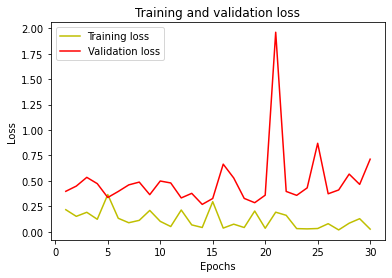

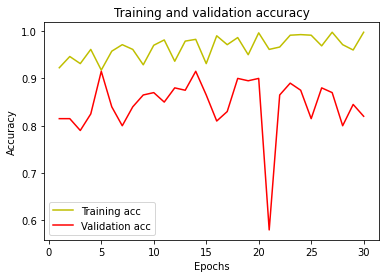

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The prediction for this image is:  [[1.]]
The actual label for this image is:  1


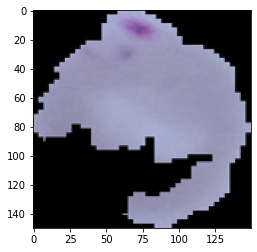

In [ ]:
#Test the model on single images 
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


In [ ]:
#Instead of checking for each image, we can evaluate the model on all test data
#for accuracy
################################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

7/7 [==============================] - 0s 8ms/step - loss: 0.7137 - accuracy: 0.8200
Accuracy =  81.99999928474426 %


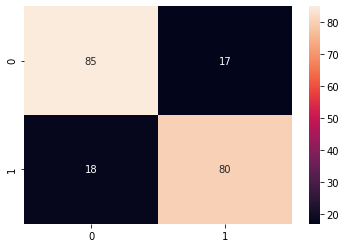

In [ ]:
#How do we know how it is doing for parasitized vs uninfected? 
################################################################

#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.1432
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True)

#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative. 

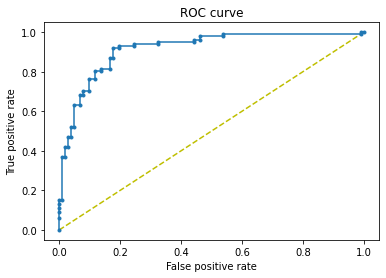

In [ ]:
#ROC can help identify the right threshold.
#Refer to video 106 for explanation of ROC curves. 
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
"""
#One way to find the best threshold once we calculate the true positive 
and false positive rates is ...
The optimal cut off point would be where “true positive rate” is high 
and the “false positive rate” is low. 
Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)
"""
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 


Ideal threshold is:  26    0.143429
Name: thresholds, dtype: float32


In [ ]:
#Now use this threshold value in the confusion matrix to visualize the balance
#between tp, fp, fp, and fn


#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier 
#is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9157663065226089
